In [3]:
!pip install mlxtend

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 18.1 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [4]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Load the dataset
df = pd.read_csv('/kaggle/input/online-retail-dataset/online_retail.csv')

In [6]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [8]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
df['InvoiceNo'].str.lower().str.startswith('c').sum()

9288

In [10]:
# Data preprocessing

df['Description'] = df['Description'].str.strip()
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df = df[~df['InvoiceNo'].str.contains('C')]

In [11]:
len(df)

532621

In [12]:
# Create a basket of purchases for the United Kingdom

basket = df[df['Country'] == 'United Kingdom'].pivot_table(
    index='InvoiceNo', 
    columns='Description', 
    values='Quantity', 
    aggfunc='sum', 
    fill_value=0
)

In [13]:
basket.head()

Description,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# Convert quantities to binary values

def encode_units(x):
    return 1 if x >= 1 else 0

basket_sets = basket.applymap(encode_units)

/tmp/ipykernel_13/2758495406.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_sets = basket.applymap(encode_units)


In [15]:
# Apply the Apriori algorithm

frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)

/usr/local/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [17]:
frequent_itemsets.head()

,support,itemsets
0,0.014624,(10 COLOUR SPACEBOY PEN)
1,0.012910,(12 MESSAGE CARDS WITH ENVELOPES)
2,0.017517,(12 PENCIL SMALL TUBE WOODLAND)
3,0.018159,(12 PENCILS SMALL TUBE RED RETROSPOT)
4,0.018052,(12 PENCILS SMALL TUBE SKULL)


In [18]:
# Generate association rules

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [20]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(DOTCOM POSTAGE),(6 RIBBONS RUSTIC CHARM),0.037926,0.045800,0.010821,0.285311,6.229451,0.009084,1.335125,0.872565
1,(6 RIBBONS RUSTIC CHARM),(DOTCOM POSTAGE),0.045800,0.037926,0.010821,0.236257,6.229451,0.009084,1.259684,0.879766
2,(JAM MAKING SET PRINTED),(6 RIBBONS RUSTIC CHARM),0.053996,0.045800,0.011571,0.214286,4.678697,0.009098,1.214436,0.831144
3,(6 RIBBONS RUSTIC CHARM),(JAM MAKING SET PRINTED),0.045800,0.053996,0.011571,0.252632,4.678697,0.009098,1.265780,0.824005
4,(6 RIBBONS RUSTIC CHARM),(JAM MAKING SET WITH JARS),0.045800,0.053514,0.010339,0.225731,4.218164,0.007888,1.222425,0.799550


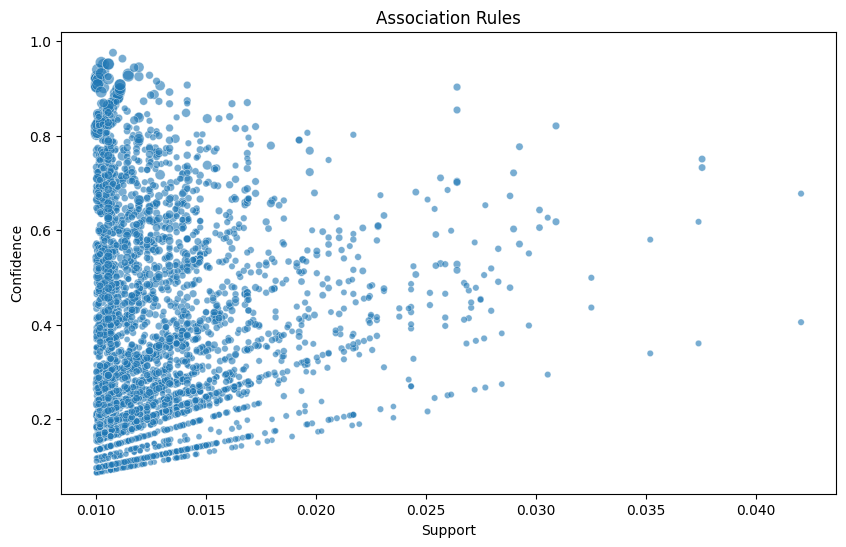

In [21]:
# Visualize association rules with a scatter plot

plt.figure(figsize=(10, 6))
sns.scatterplot(x="support", y="confidence", size="lift", data=rules, legend=False, alpha=0.6)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules')
plt.show()

In [23]:
# Sort rules by confidence and support

sorted_rules = rules.sort_values(by=['confidence', 'support'], ascending=[False, False])

In [24]:
# Print top association rules with the highest dependency

print("Top association rules with highest dependency:")

for index, rule in sorted_rules.head().iterrows():
    print(f"Rule: {rule['antecedents']} -> {rule['consequents']}")
    print(f"Support: {rule['support']}, Confidence: {rule['confidence']}, Lift: {rule['lift']}\n")

Top association rules with highest dependency:
Rule: frozenset({'BEADED CRYSTAL HEART PINK ON STICK'}) -> frozenset({'DOTCOM POSTAGE'})
Support: 0.010767088065138205, Confidence: 0.9757281553398058, Lift: 25.727250287971035

Rule: frozenset({'SUKI  SHOULDER BAG', 'JAM MAKING SET PRINTED'}) -> frozenset({'DOTCOM POSTAGE'})
Support: 0.011195628883651167, Confidence: 0.9631336405529953, Lift: 25.395167799213723

Rule: frozenset({'HERB MARKER MINT', 'HERB MARKER THYME'}) -> frozenset({'HERB MARKER ROSEMARY'})
Support: 0.010231412041997, Confidence: 0.9550000000000001, Lift: 77.17722943722944

Rule: frozenset({'HERB MARKER ROSEMARY', 'HERB MARKER PARSLEY'}) -> frozenset({'HERB MARKER THYME'})
Support: 0.010552817655881723, Confidence: 0.9516908212560385, Lift: 77.24419239655533

Rule: frozenset({'HERB MARKER THYME', 'HERB MARKER PARSLEY'}) -> frozenset({'HERB MARKER ROSEMARY'})
Support: 0.010552817655881723, Confidence: 0.9516908212560385, Lift: 76.90980195328021



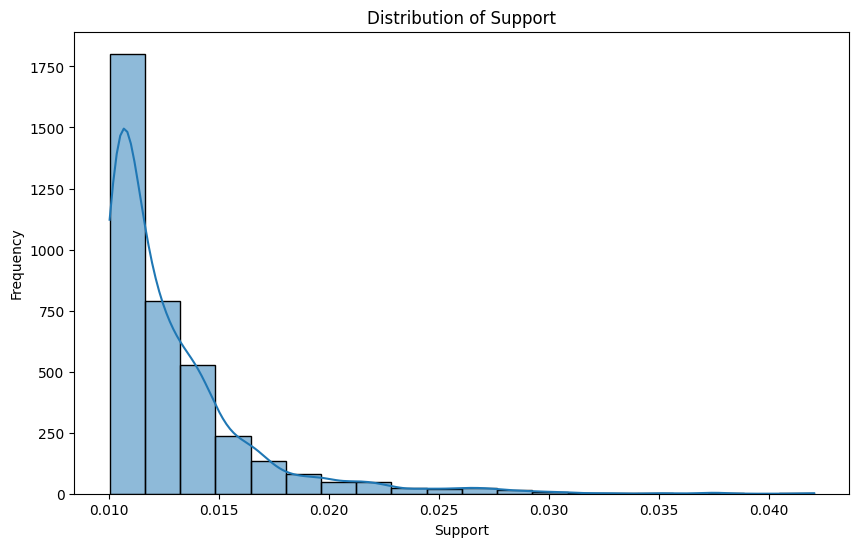

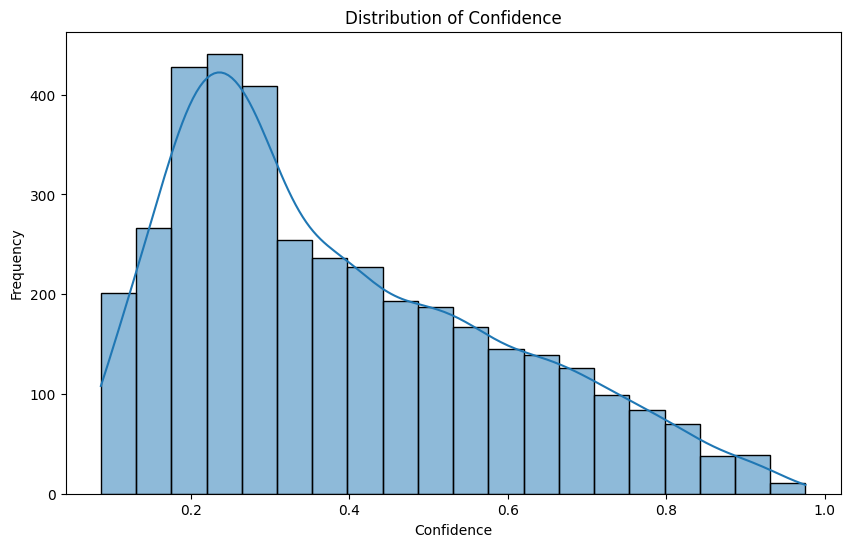

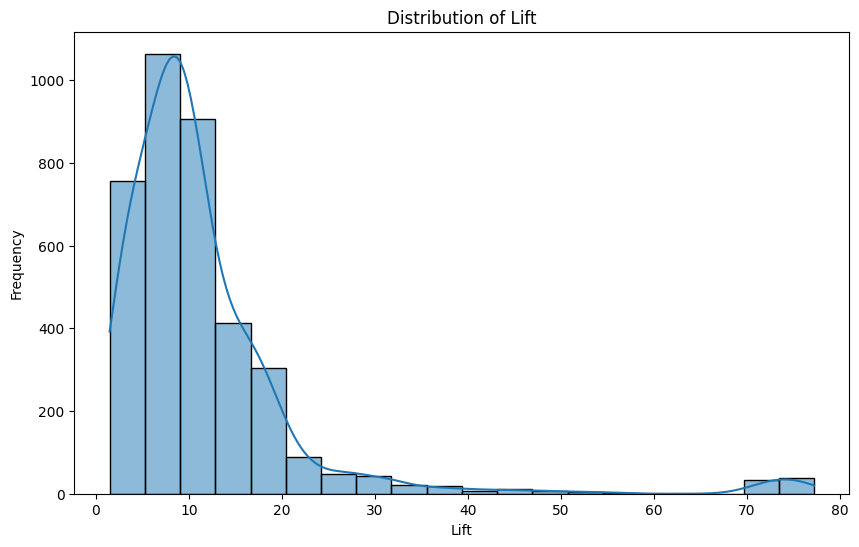

In [30]:
# Visualize the distribution of support
plt.figure(figsize=(10, 6))
sns.histplot(rules['support'], bins=20, kde=True)
plt.title('Distribution of Support')
plt.xlabel('Support')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution of confidence
plt.figure(figsize=(10, 6))
sns.histplot(rules['confidence'], bins=20, kde=True)
plt.title('Distribution of Confidence')
plt.xlabel('Confidence')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution of lift
plt.figure(figsize=(10, 6))
sns.histplot(rules['lift'], bins=20, kde=True)
plt.title('Distribution of Lift')
plt.xlabel('Lift')
plt.ylabel('Frequency')
plt.show()

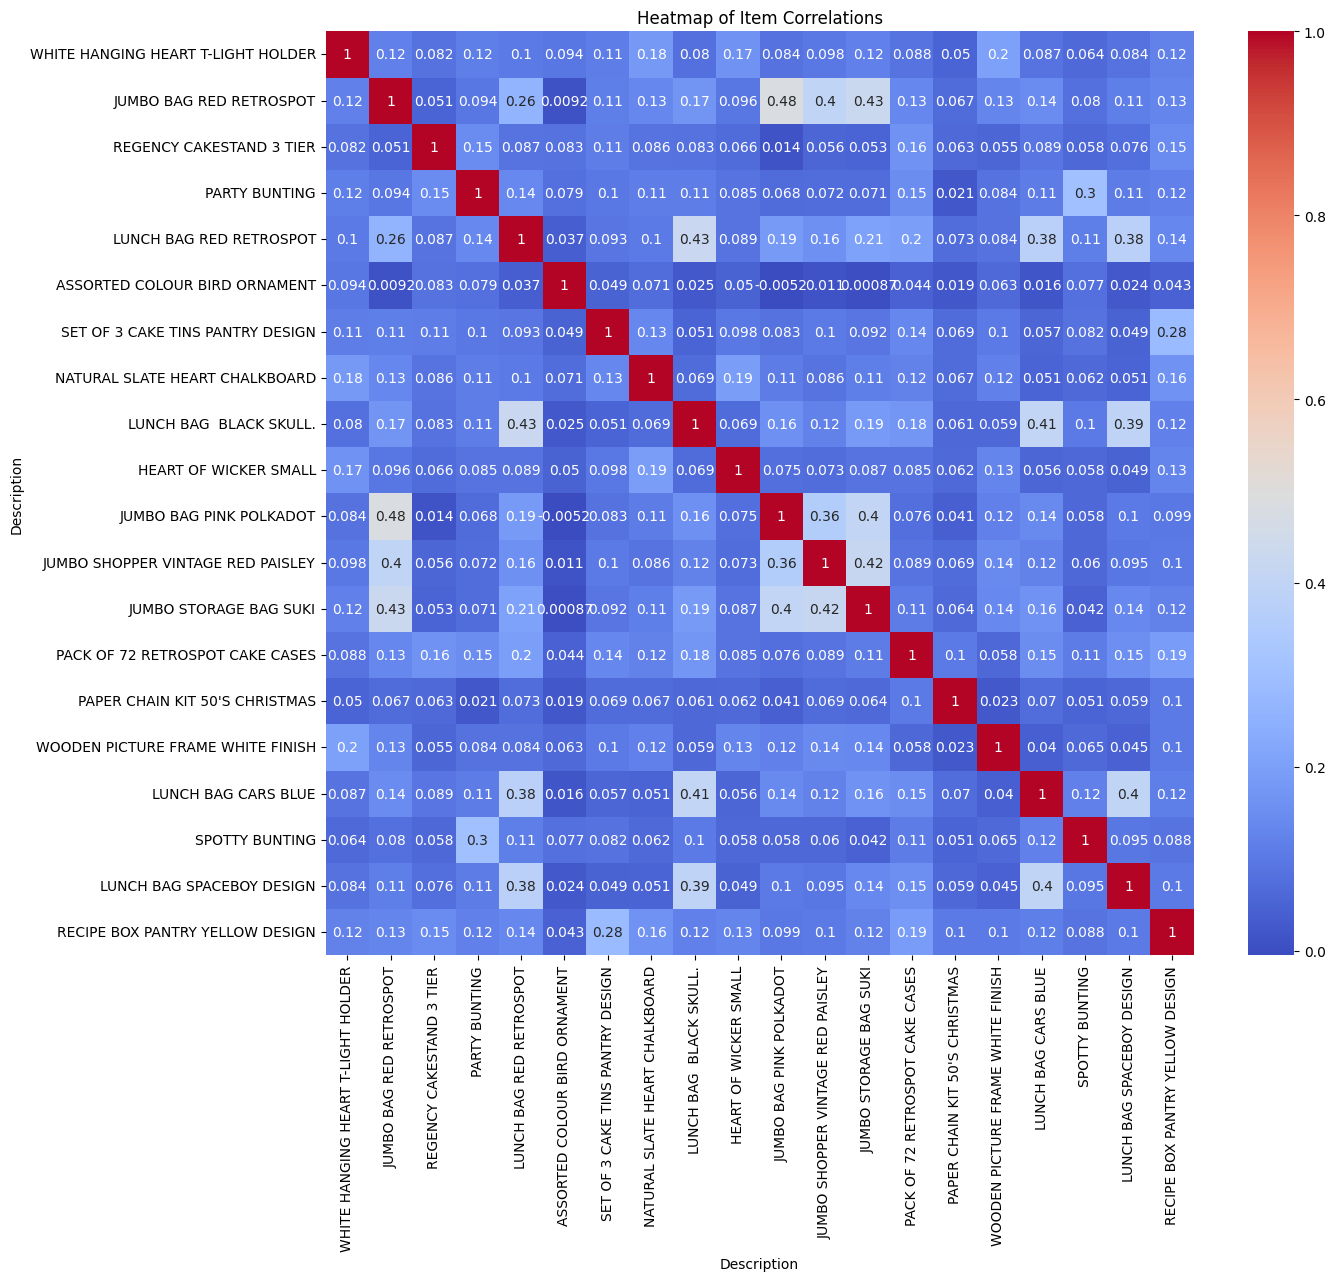

In [31]:
# Heatmap to visualize item correlations
top_items = frequent_itemsets.sort_values(by='support', ascending=False).head(20)['itemsets']
itemsets = [item for subset in top_items for item in subset]
basket_top = basket_sets[itemsets]

# Create a correlation matrix
corr_matrix = basket_top.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Item Correlations')
plt.show()